In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [2]:
import magpylib as mp

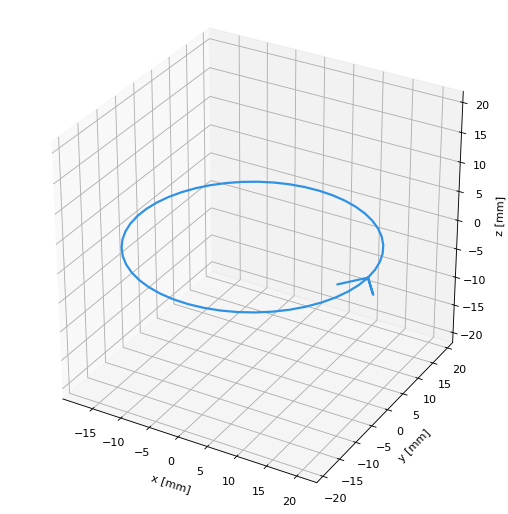

In [3]:
current_loop=mp.current.Loop(current=1,position=(0,0,0),diameter=39)
mp.show(current_loop)

In [19]:
B=np.zeros((40,40,20,3),dtype=float)
for i in range(-200,200,10):
    for j in range(-200,200,10):
        for k in range(50,250,10):
            B[i//10+20,j//10+20,k//10-5]=current_loop.getB((i,j,k))

In [20]:
np.save('results/B.npy',B)

(-6.0, -3.5)

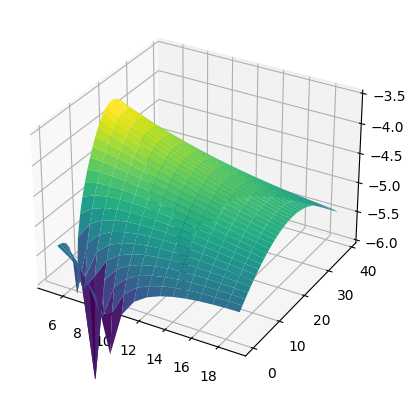

In [34]:
from matplotlib import pyplot as plt
x=np.arange(5,20,1)
z=np.arange(0,40,1)
X,Z=np.meshgrid(x,z)
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.plot_surface(X,Z,np.log10(np.abs(B[:,22,5:,2])),cmap='viridis',edgecolor='none')
ax.set_zlim(-6,-3.5)

In [73]:
def get_signal_strength(x,y,z,dx1,dy1,dz1,dx2,dy2,dz2,r,k):
    current_loop=mp.current.Loop(current=1,position=(0,0,0),diameter=r)
    B1=current_loop.getB((x+dx1,y+dy1,z+dz1))[2]
    B2=current_loop.getB((x+dx2,y+dy2,z+dz2))[2]
    return np.log10(k*B1*B2)

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from ast import literal_eval as make_tuple

In [37]:
def read_complex_binary2(filename):
    """ Read file of float32 into complex array.
    """

    with open(filename, 'rb') as f:
        bytes = f.read()
    data = np.frombuffer(bytes, dtype=np.float32).reshape(-1, 2)
    data = data[:, 0] + 1j*data[:, 1]
    return data

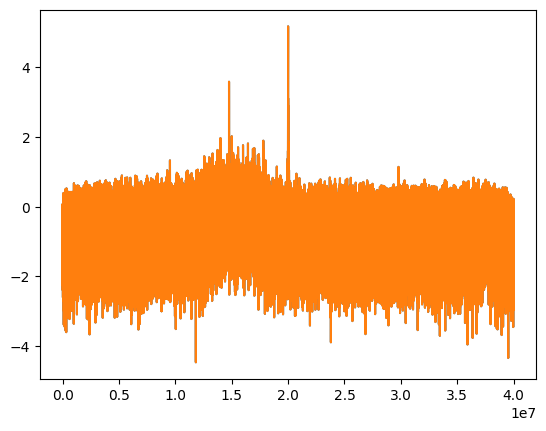

(array([14760153, 14760158, 14760159, ..., 20005221, 20005224, 20005225]),)


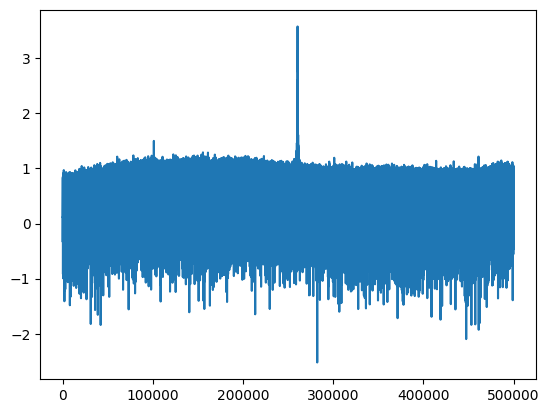

(array([260153, 260158, 260159, 260161, 260162, 260168, 260173, 260177,
       260178, 260180, 260187, 260189, 260192, 260193, 260194, 260200,
       260201, 260202, 260204, 260208, 260212, 260218, 260226, 260229,
       260230, 260236, 260237, 260238, 260239, 260242, 260243, 260245,
       260246, 260247, 260248, 260251, 260252, 260253, 260254, 260255,
       260256, 260260, 260262, 260263, 260267, 260268, 260269, 260270,
       260271, 260273, 260274, 260276, 260277, 260279, 260280, 260281,
       260282, 260283, 260284, 260285, 260286, 260287, 260288, 260289,
       260290, 260291, 260292, 260293, 260294, 260295, 260296, 260297,
       260299, 260300, 260301, 260303, 260304, 260305, 260306, 260307,
       260308, 260310, 260311, 260312, 260313, 260314, 260315, 260316,
       260317, 260318, 260319, 260320, 260321, 260322, 260323, 260324,
       260325, 260326, 260327, 260328, 260329, 260330, 260331, 260332,
       260333, 260334, 260335, 260336, 260337, 260338, 260339, 260340,
     

In [41]:
examplefile = "results/mar_1/(180, 60)"
signal = read_complex_binary2(examplefile)
examplefile = "results/mar_1/(180, 60)"
signal2 = read_complex_binary2(examplefile)

np.fft.fftshift(np.fft.fft(signal))
np.fft.fftshift(np.fft.fft(signal2))
transformed_fft_sig = np.log10(np.fft.fftshift(np.fft.fft(signal)))
transformed_fft_sig2 = np.log10(np.fft.fftshift(np.fft.fft(signal2)))
plt.plot(transformed_fft_sig)
plt.plot(transformed_fft_sig2)
plt.show()
indices_low = np.where((transformed_fft_sig > 2) & (transformed_fft_sig < 4))
print(np.where((transformed_fft_sig > 2) & (transformed_fft_sig < 4)))
transformed_fft_sig = np.log10(np.fft.fftshift(np.fft.fft(signal)))[14500000:15000000]
plt.plot(transformed_fft_sig)
plt.show()
print(np.where((transformed_fft_sig > 2) & (transformed_fft_sig < 4)))

In [43]:
file_path = "results/mar_1/"
matrix  = np.zeros((10, 10))
for files in glob.glob(file_path+"*"):
    splitty = files.split("/")[-1]
    tup_split = make_tuple(splitty)
    x = int(tup_split[0]/20)
    y = int(tup_split[1]/20)
    signal = read_complex_binary2(files)
    transformed_fft_sig = np.log10(np.fft.fftshift(np.fft.fft(signal)))
    #low_value = transformed_fft_sig[bin_value1]
    high_value = transformed_fft_sig[14500000:15000000]
    high_value = np.max(high_value)
    matrix[x][y] = high_value

/tmp/ipykernel_1359/3002051114.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  matrix[x][y] = high_value


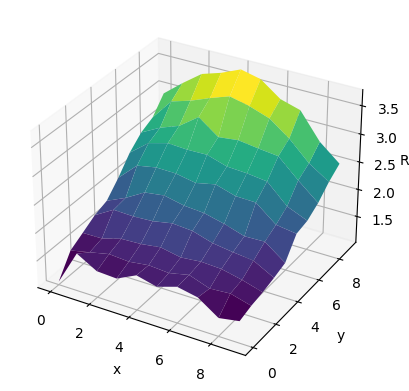

In [44]:
fig = plt.figure()
ax = plt.axes(projection='3d')

x = np.arange(0,10,1)
y = np.arange(0,10,1)
X, Y = np.meshgrid(x, y)
Z = matrix
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('RSSI');

In [65]:
xdata,ydata=[],[]
for i in range(10):
    for j in range(10):
        xdata.append((i*20,j*20))
        ydata.append(matrix[i][j])
xdata=np.array(xdata).T

In [75]:
from scipy.optimize import curve_fit
def get_signal_strength_wrapper(xdata,z,dx1,dy1,dz1,dx2,dy2,dz2,r,k):
    xs,ys=xdata
    results=[]
    for x,y in zip(xs,ys):
        results.append(get_signal_strength(x,y,z,dx1,dy1,dz1,dx2,dy2,dz2,r,k))
    return np.array(results)
ans=curve_fit(get_signal_strength_wrapper,xdata,ydata,p0=[0,0,0,0,0,0,0,10,10],maxfev = 100000000) # Params: z, dx1, dy1, dz1, dx2, dy2, dz2, r, k

/tmp/ipykernel_1359/680413125.py:5: RuntimeWarning: invalid value encountered in log10
  return np.log10(k*B1*B2)
